# Übung 1.2 - Lineare Regression (LASSO) am Beispiel Presshärten 
VO Maschinelles Lernen in der Produktion, WS2019/20, Moritz von Unold, Richard Lux

#### In diesem Notebook wird das Verfahren Lineare Regression mit LASSO anhand des Anwendungsbeispiels Presshärten geübt.

![alt text](Prozess_Modellentwicklung_v2.png "Title")

#### 0. Bibliotheken importieren

#### 1. Daten erfassen
- Daten importieren

#### 2. Daten erkunden
- Daten tabellarisch darstellen
- statistische Kennzahlen der Daten berechnen

#### 3. Daten vorbereiten
- Daten in Trainings- und Testdaten aufteilen

#### 4. Modelle bilden (hier nur 1 Modell)
- Mögliche Hyperparameter (Modell-Parameter) anzeigen
- Modell erstellen (untrainiert)
- Modell anhand Trainingsdaten trainieren

#### 5. (Modelle validieren)
- Da nur ein Modell erstellt wird entfällt dieser Schritt

#### 6. Modell testen & anwenden
- Berechnung der Modellvorhersage auf den Testdaten
- Bewertung der Modellgüte mittels Graph (Y/Y_pred)
- Bewertung der Modellgüte mittles MAE

#### 7. Visualisierung Zusammenhang alpha-Wert und MAE
- Trainieren und Testen von 30 Modellen mit unterschiedlichen alpha-Werten

### 0. Bibliotheken importieren

In [1]:
# 0. Code-Block

# Importiere benötigte Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
%matplotlib inline

### 1. Daten erfassen - Daten importieren

TODO:
- Wähle eine Zahl zwischen 1 und 100 für die Generierung deiner spezifischen Zufallszahlen  (1. Code-Block - Zeile 8)
- Ausführen des 1. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Gewählte Zufallszahl

In [9]:
# 1. Code-Block

# Erstelle eigene Zufallszahlen
my_seed = 1

# Lade Datensatz
df = pd.read_excel("Presshärten_verrauscht_normiert.xlsx")

# Ausgabe gewählte Zufallszahlen
print("\nGewählte Zahl für Zufallszahlen: \t" + str(my_seed))


Gewählte Zahl für Zufallszahlen: 	1


### 2.1 Daten erkunden - Daten tabellarisch darstellen

TODO:
- Stell ein wie viele der letzten Tabellen-Zeilen du anzeigen möchtest (2. Code-Block - Zeile 4)
- Ausführen des 2. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Tabelle des Datensatzes

In [10]:
# 2. Code-Block

# Ausgabe der Daten in tabellarischer Form
df.tail(5)

,Blechdicke,Transportdauer,Blechtemperatur,Umformdauer,Umformkraft,Abstand,Formtemperatur,Bauteilhärte
994,0.453649,0.440747,0.344649,0.587909,0.282941,0.625996,0.633054,446.780593
995,0.018277,0.833913,0.794252,0.914972,0.458397,0.700290,0.592180,420.154108
996,0.770196,0.488467,0.738761,0.690141,0.944929,0.495163,0.358400,469.331860
997,0.498864,0.205670,0.465946,0.980991,0.620163,0.404376,0.757095,465.872932
998,0.586270,0.548669,0.814166,0.101223,0.841402,0.836565,0.619914,457.513305


### 2.2 Daten erkunden - statistische Kennzahlen der Daten berechnen

Ausgabe der statistischen Kennzahlen aller Variablen.

TODO:
- Ausführen des 3. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- statistische Kennzahlen

In [11]:
# 3. Code-Block

# Zeige statistische Kennzahlen aller Variablen an
df.describe()

,Blechdicke,Transportdauer,Blechtemperatur,Umformdauer,Umformkraft,Abstand,Formtemperatur,Bauteilhärte
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.500017,0.500008,0.499979,0.500009,0.500005,0.500007,0.500005,432.814644
std,0.289357,0.289343,0.289361,0.289323,0.289357,0.289362,0.289358,37.120606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,328.631002
25%,0.249762,0.249579,0.249829,0.249423,0.249832,0.249508,0.249452,405.306562
50%,0.500226,0.499556,0.500350,0.499702,0.499790,0.499635,0.499899,438.044693
75%,0.750045,0.750429,0.750292,0.750061,0.749908,0.750645,0.750665,463.420924
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,505.083592


### 3.1 Daten vorbereiten - Aufteilen der Daten in Trainings- und Testdaten

Der Datensatz wird in einen Trainingsdatensatz und einen Testdatensatz aufgeteilt:
Übliche Werte sind für den Trainingsdatensatz 70 - 80% der Daten und für den Testdatensatz 20 - 30%.

Mit dem Trainingsdatensatz wird das Regressionsmodell trainiert, der Testdatensatz dient dazu das trainierte Modell zu testen.

TODO:
- Setzte für train_size einen Wert zwischen 0.1 und 0.9 ein (4. Code-Block - Zeile 4)
- Beispiel: Ein Wert von 0.8 bedeutet der Datensatz wird in 80% Trainingsdaten und 20% Testdaten unterteilt
- Ausführen des 4. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Größe der Datensätze
- Ersten 3 Zeilen von X und von y

In [45]:
# 4. Code-Block

# Verhältnis Trainings- und Testdaten
train_size = 0.9

# Teile Datensatz in Trainings- und Testdatensatz auf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Bauteilhärte"]),
    df["Bauteilhärte"],
    test_size=(1 - train_size),
    random_state=my_seed,
)

# Ausgabe Datensätze und Anzahl Datenpunkte
print(
    "\nAnzahl Traingsdaten: \t"
    + str(len(y_train))
    + " / "
    + str(len(df))
    + " \t("
    + str("%.2f" % (100 * len(y_train) / len(df)))
    + "%)"
)
print(
    "Anzahl Testdaten: \t"
    + str(len(y_test))
    + " / "
    + str(len(df))
    + " \t("
    + str("%.2f" % (100 * len(y_test) / len(df)))
    + "%)"
)
print("\nX: \n" + str(X_train.head(3)))
print("\ny:\tBauteilhärte\n" + str(y_train.head(3)))


Anzahl Traingsdaten: 	899 / 999 	(89.99%)
Anzahl Testdaten: 	100 / 999 	(10.01%)

X: 
     Blechdicke  Transportdauer  Blechtemperatur  Umformdauer  Umformkraft  \
335    0.095434        0.902764         0.317976     0.908246     0.709540   
13     0.624760        0.896085         0.771789     0.745839     0.171717   
871    0.105383        0.545678         0.753259     0.495874     0.019050   

      Abstand  Formtemperatur  
335  0.177209        0.858608  
13   0.499489        0.730104  
871  0.650585        0.800728  

y:	Bauteilhärte
335    357.496848
13     403.881300
871    441.941499
Name: Bauteilhärte, dtype: float64


### 4.1 Modelle bilden - Mögliche Hyperparameter anzeigen

Vor der Erstellung eines Modells lassen wir uns zunächst alle einstellbaren Hyperparameter anzeigen.

TODO:
- Ausführen des 5. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Mögliche Hyperparameter für die Erstellung des Linearen Modells

In [46]:
# 5. Code-Block

# Ausgabe möglicher Hyperparameter
from sklearn import linear_model

linear_model.Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Beschreibung der Hyperparameter:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### 4.2 Modelle bilden - Modell erstellen (untrainiert)

Wir erstellen ein Lineares LASSO-Modell. Diese enthält den zusätzlichen Hyperparameter 'alpha'. Alpha ist der Strafterm welcher das ausklammern von Variablen mit geringem Einfluss auf das Ergebnis ermöglicht.

Als Hyperparameter werden neben dem Strafterm alpha, 'fit_intercept' als True eingestellt, da wir ein Regressionsmodell MIT Konstante berechnen wollen. Des Weiteren wird 'random_state' auf 'my_seed' eingestellt damit der Algorithmus mit unseren spezifischen Zufallszahlen arbeitet.

TODO:
- Wähle einen alpha-Wert zwischen 2 und 0.0000001, z.B: 0.1 (6. Code-Block - Zeile 4) 
- Setzte in die Klammer "fit_intercept=True" ein (6. Code-Block - Zeile 8)
- Setzte in die Klammer "random_state=my_seed" ein (6. Code-Block - Zeile 8)
- Setzte in die Klammer "alpha=alpha" ein (6. Code-Block - Zeile 8)
- Ausführen des 6. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Hyperparameter des erstellten Modells

Versuche den alpha-Wert so einzustellen das das Modell aus 2-4 Variablen besteht (Anzahl Variablen im Modell siehe Ausgabe 4.3).

In [47]:
# 6. Code-Block

# Einstellen des alpha-Parameters (= Lasso-Strafterm)
alpha = 0.01

# Erstelle Lineares LASSO-Modell
lasso = linear_model.Lasso( fit_intercept=True , random_state=my_seed , alpha=alpha)

# Ausgabe Hyperparameter des Modells
lasso.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 1,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

### 4.3 Modelle bilden - Modelle anhand Trainingsdaten trainieren

Während des Trainings werden die Parameter des Modells/der Regressionsgerade angepasst sodass dieses die Daten des Trainingsdatensatzes abbildet (Gradientenverfahren). 

TODO:
- Ausführen des 7. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Gleichung der Regressionsgeraden
- Graph: Einfluss der Input-Variablen auf die Bauteilhärte


Regressionsmodell: 
y = 460.135 + 2.214 * Blechdicke + -106.268 * Transportdauer + 56.453 * Blechtemperatur + 2.040 * Umformdauer + 7.103 * Umformkraft + 1.113 * Abstand + -17.480 * Formtemperatur


Text(0.5,1,'Einfluss der Variablen auf die Bauteilhärte')

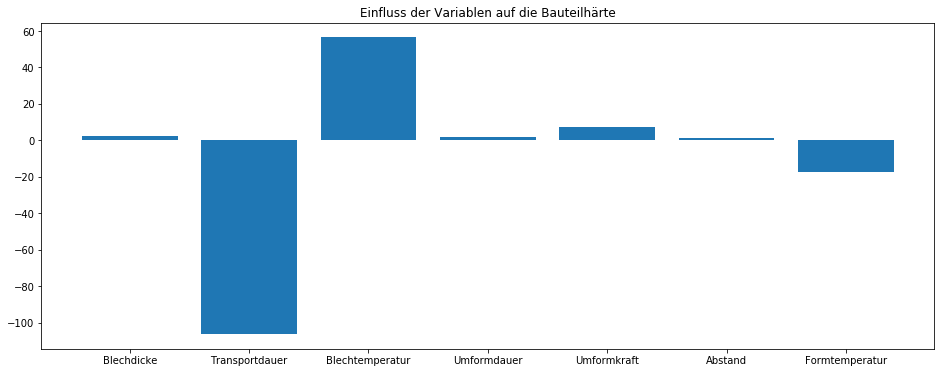

In [48]:
# 7. Code-Block

# Trainieren des Modells
lasso.fit(X_train, y_train)

# Ausgabe des Modells
model_1 = "y = " + str("%.3f" % lasso.intercept_)
for i in range(len(lasso.coef_)):
    model_1 += (
        " + "
        + str("%.3f" % lasso.coef_[i])
        + " * "
        + str(list(X_train)[i])
    )
print("\nRegressionsmodell: \n" + str(model_1))

# Ausgabe Graph
fig = plt.figure(figsize=(16, 6))
plt.bar(list(X_train), lasso.coef_, align="center")
plt.title("Einfluss der Variablen auf die Bauteilhärte")

Wie viele Variablen sind noch im Modell enthalten (wurden also nicht durch den Lasso-Strafterm 0 gesetzt)?

Versuche durch die Wahl eines geeigneten Lasso-Wertes (alpha) in Punkt 4.2 ein Modell mit 2-4 Variablen zu erstellen.

### 5. Validieren der Modelle - entfällt

Dieser Schritt ist nur nötig wenn mehrere Modelle erstellt werden.

### 6.1 Modell testen & anwenden - Berechnung der Modellvorhersage auf den Testdaten

Mit dem erstellten Modell wird eine Vorhersage für alle Testdaten berechnet und diese mit den realen Werten verglichen.

TODO:
- Stelle ein wie viele Zeilen des Ergebnisses du anzeigen lassen willst (8. Code-Block - Zeile 12)
- Ausführen des 8. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Tabelle Reale Bauteilhärte, Modell-Vorhersage der Bauteilhärte sowie die Abweichung

In [49]:
# 8. Code-Block

# Berechne Modellvorhersage für jede Zeile des Test-Datensatzes
results_test = pd.DataFrame(y_test)
results_test["Vorhersage_Bauteilhärte"] = lasso.predict(X_test)

# Berechne Differenz: Realer Wert - Vorhersage
results_test["Abweichung_Vorhersage"] = (
    results_test["Bauteilhärte"] - results_test["Vorhersage_Bauteilhärte"]
)

# Ausgabe Tabelle
print("\nModell-Vorhersage und reale Werte der Testdaten:")
results_test.head(5)


Modell-Vorhersage und reale Werte der Testdaten:


,Bauteilhärte,Vorhersage_Bauteilhärte,Abweichung_Vorhersage
507,466.756436,467.642879,-0.886443
608,418.491638,419.698300,-1.206663
452,486.813705,476.404685,10.409020
368,364.774452,393.137458,-28.363006
242,398.743223,403.476488,-4.733265


### 6.2 Modell testen & anwenden - Bewertung der Modellgüte mittels Graph (Y/Y_pred)

Graph der Modell-Vorhersage über den realen Werten.

TODO:
- Stelle die Größe des auszugebenden Graphen ein, z.B. figsize=(9, 8) (9. Code-Block - Zeile 5)

(Die Größe ist in Zoll -> 1 Zoll = 2,54 cm)
- Ausführen des 9. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Tabelle mit realer Bauteilhärte, Modell-Vorhersage der Bauteilhärte sowie die Abweichung

Text(0.5,1,'Lineare Regression Lasso - Testdatensatz')

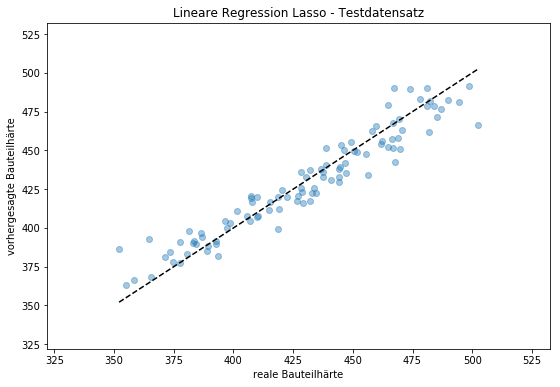

In [50]:
# 9. Code-Block

# Ausgabe Graph
min_test, max_test = y_test.min(), y_test.max()
fig = plt.figure(figsize=(9, 6))
plt.plot(y_test, np.squeeze(lasso.predict(X_test)), "o", alpha=0.4)
plt.plot([min_test, max_test], [min_test, max_test], "--", c=(0, 0, 0))
plt.xlim(min_test - 0.2 * (max_test - min_test), max_test + 0.2 * (max_test - min_test))
plt.ylim(min_test - 0.2 * (max_test - min_test), max_test + 0.2 * (max_test - min_test))
plt.xlabel("reale Bauteilhärte")
plt.ylabel("vorhergesagte Bauteilhärte")
plt.title("Lineare Regression Lasso - Testdatensatz")

### 6.3 Modell testen & anwenden - Berechnung MAE

Um die Güte des Regressionsmodells zu bestimmen wird der MAE (Mean-Absolut-Error) berechnet. 

TODO:
- Ausführen des 10. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- MAE

In [51]:
# 10. Code-Block

# Berechne MAE
from sklearn.metrics import mean_absolute_error

y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Ausgabe
print("\nMAE: \t" + str("%.5f" % mae))


MAE: 	8.60706


### 7. Visualisierung Zusammenhang Alpha-Wert und MAE

Um den Einfluss des alpha-Wertes zu beurteilen werden 80 Modelle mit verschiedenen alpha-Werten trainiert und jeweils der RMSE berechnet.

TODO:
- Wähle den niedrigsten und höchsten alpha-Wert (alpha_min, alpha_max), es werden 80 Modelle mit varrierendem alpha-Wert beginnend beim niedrigsten und endend beim höchsten alpha-Wert berechnet (10. Code-Block - Zeile 4 & 5)
- Beginne mit einer großen Spanne für alpha (z.B. 0.0001 - 3) und taste dich schrittweise an das Optimum an.
- Ausführen des 11. Code-Blocks (markieren und "Run" drücken)

AUSGABE:
- Graph: Zusammenhang Alpha-Wert und RMSE (bzw. Modellgüte)

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[   0.         -101.44370879   51.62202981    0.            2.47478837
    0.          -13.38677613]

Geringster MAE (höchste Genauigkeit des Modells) bei einem alpha-Wert von 0.00000.


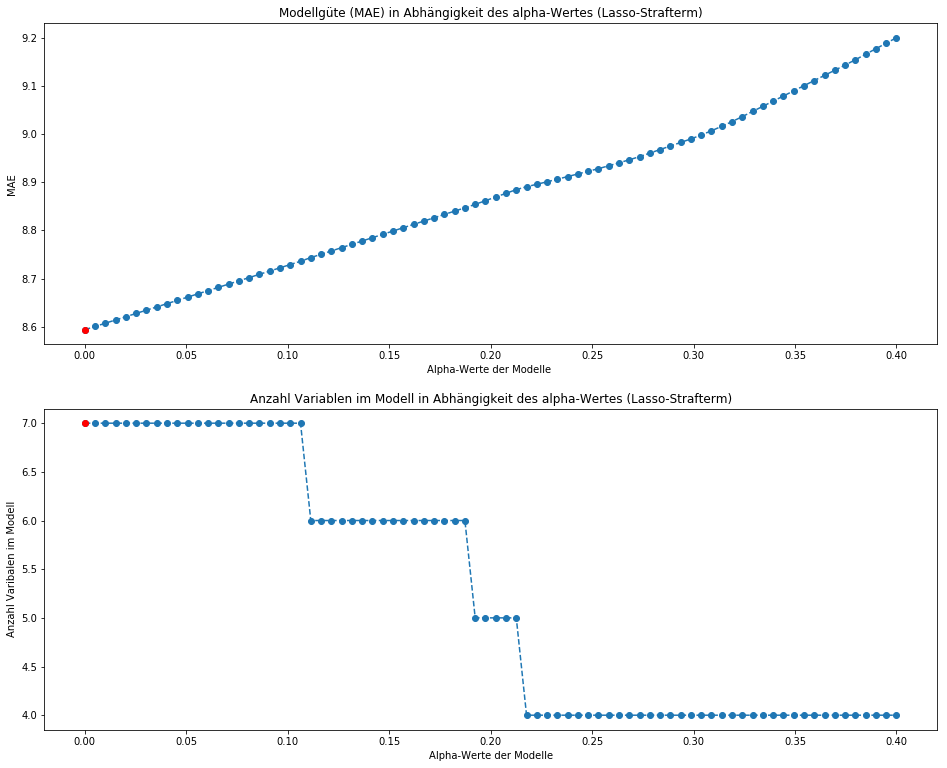

In [59]:
# 11. Code-Block

# Einstellen des Lasso-Strafterms/alpha-Wertes
alpha_min = 0.0000001  # Nicht 0 einsetzten, z.B. 0.0000001
alpha_max = 0.4  # z.B. 2.0

# Trainiere 80 Modelle mit Hyperparameter alpha zwischen lasso_begin und lasso_end
list_MAE = []
list_varcount = []
alphas = np.linspace(alpha_min, alpha_max, 80)
for alpha in alphas:

    # Erstelle und Trainiere Lineares Modell
    lasso = linear_model.Lasso(alpha=(alpha))
    lasso.fit(X_train, y_train)

    # Berechne Vorhersage und RMSE
    y_P_test = lasso.predict(X_test)
    y_pred = lasso.predict(X_test)
    list_MAE.append(mean_absolute_error(y_test, y_pred))

    # Zähle Variablen nicht 0
    coefs = 0
    for coef in lasso.coef_:
        if coef != 0:
            coefs += 1
    list_varcount.append(coefs)
print(list_varcount)
print(lasso.coef_)

# Ausgabe Graphen
idx_min = list_MAE.index(min(list_MAE))
plt.figure(figsize=(16, 13))
plt.subplot(2, 1, 1)
plt.plot(alphas, list_MAE, "o--")
plt.xlabel("Alpha-Werte der Modelle ")
plt.ylabel("MAE")
plt.title("Modellgüte (MAE) in Abhängigkeit des alpha-Wertes (Lasso-Strafterm)")
plt.plot(alphas[idx_min], list_MAE[idx_min], "ro")
plt.subplot(2, 1, 2)
plt.plot(alphas, list_varcount, "o--")
plt.xlabel("Alpha-Werte der Modelle")
plt.ylabel("Anzahl Varibalen im Modell")
plt.title(
    "Anzahl Variablen im Modell in Abhängigkeit des alpha-Wertes (Lasso-Strafterm)"
)
plt.plot(alphas[idx_min], list_varcount[idx_min], "ro")

# Ausgabe bester alpha-Wert
print(
    "\nGeringster MAE (höchste Genauigkeit des Modells) bei einem alpha-Wert von "
    + str("%.5f" % alphas[idx_min])
    + "."
)

### Verständnisfragen:

1. Welche Vorteile/Unterschiede besitzt die Lineare Regression mit LASSO gegenüber der Linearen Regression?
2. Welcher Alpha-Wert ergibt den geringsten MAE für das Problem in diesem Notebook? Wie viele und welche Variablen enthält das Modell mit diesem alpha-Wert? Welchen MAE hat das Modell?